In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split as tts
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

X_train,X_val,y_train,y_val=tts(X_train,y_train,test_size=0.2,random_state=0)

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [6]:
model.add(Flatten())

In [7]:
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [8]:
result=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=35,verbose=0)

In [10]:
model.save("/content/drive/MyDrive/My Colab/mnist_model.h5")

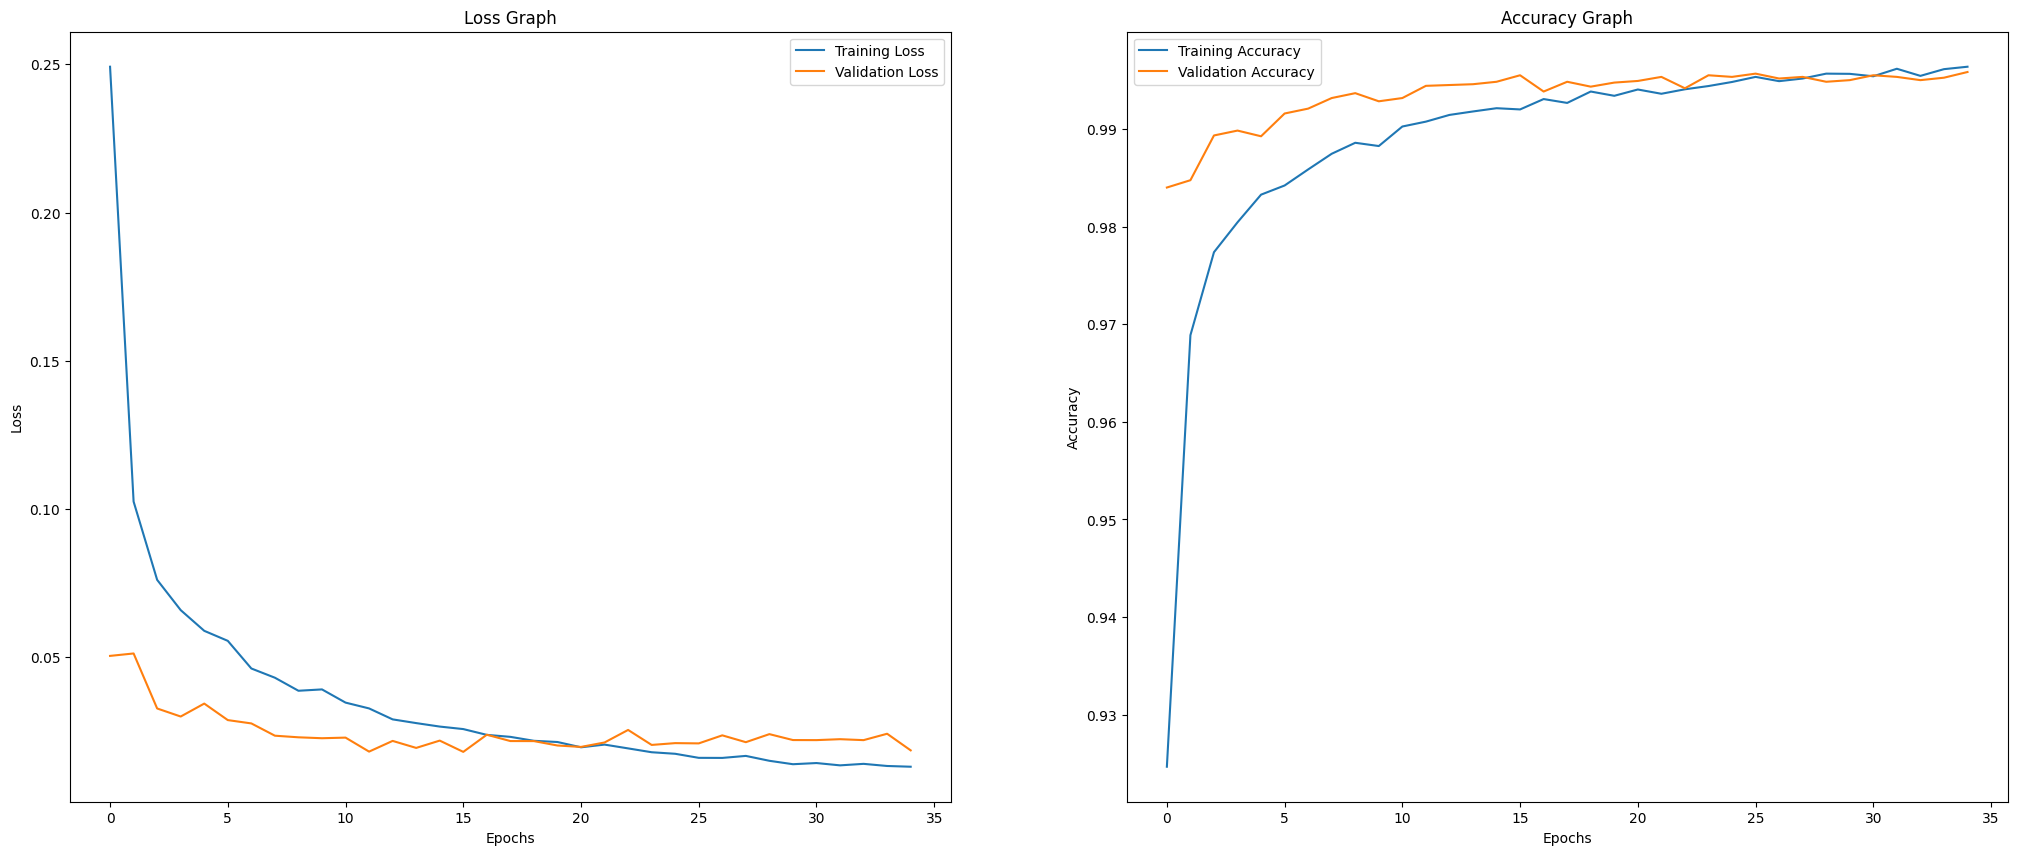

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].plot(result.history["loss"], label="Training Loss")
ax[0].plot(result.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"], label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
